In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering, KMeans

from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


# Load the dataset

In [27]:
df = pd.read_csv(r"C:\Users\abdel\Downloads\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Hierarchical Clustering

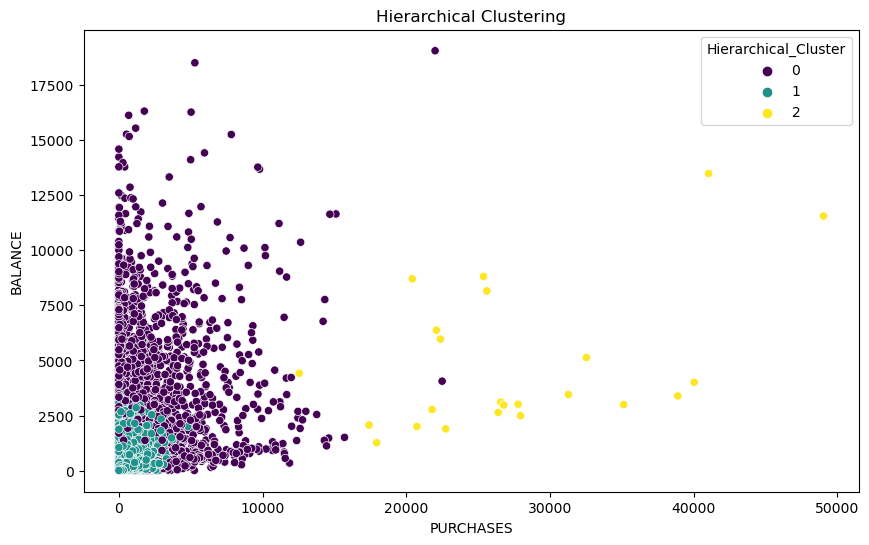

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(df.drop('CUST_ID', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()

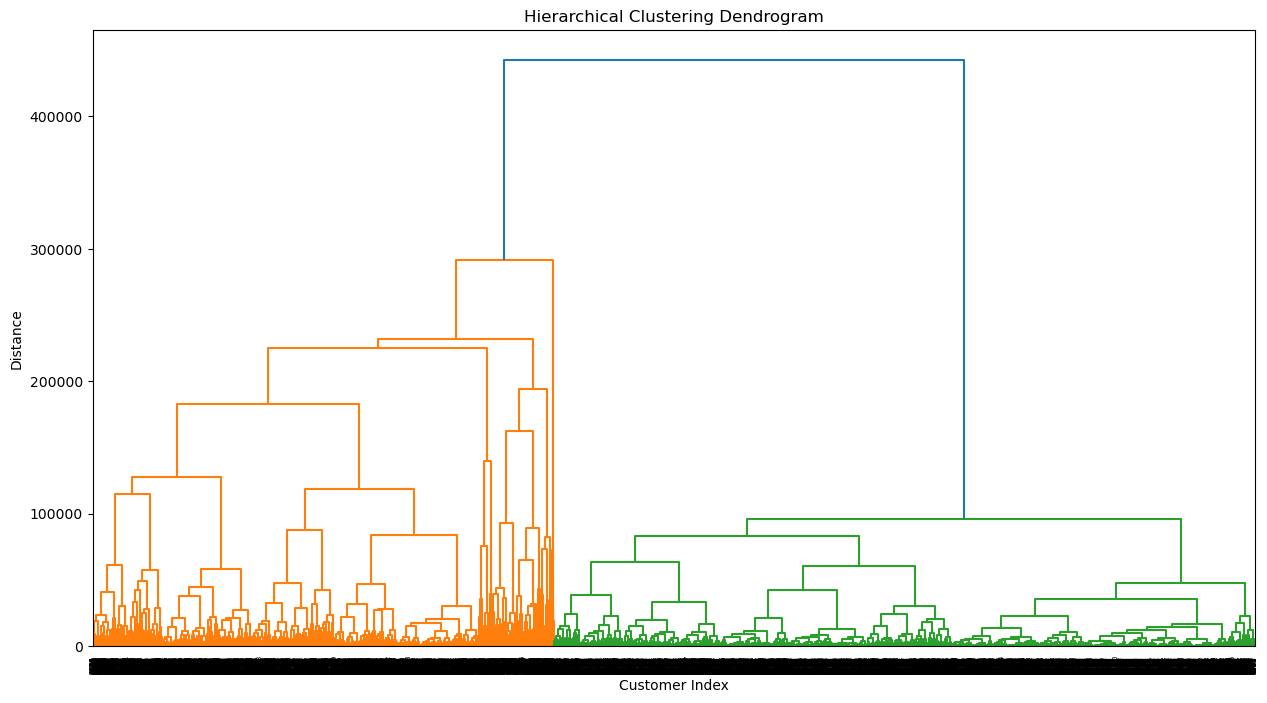

In [20]:
linked = linkage(df[numeric_columns], 'ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# K-means clustering

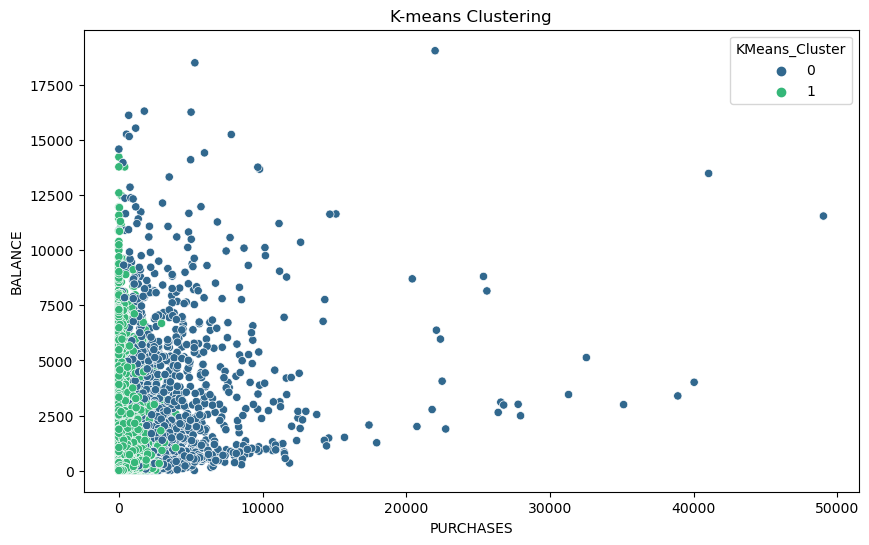

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Apply K-means clustering
k = 2  # You can choose the number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()

# 5. Try different K values and select the best one. (Silhouette Scores)

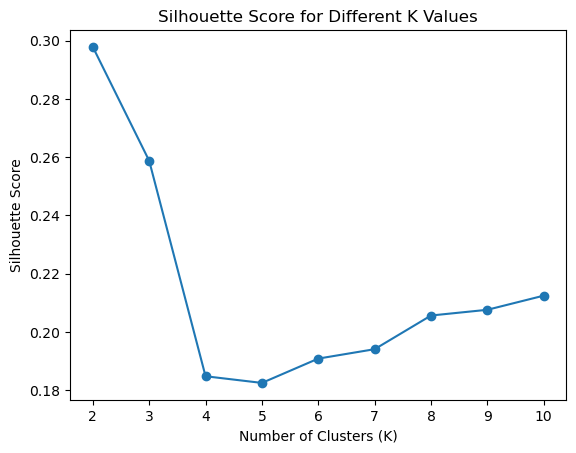

The best K value is: 2


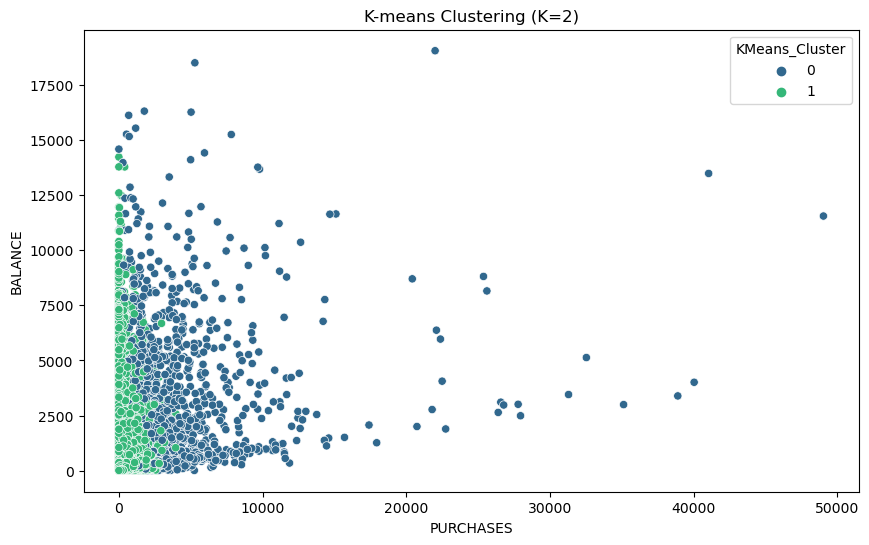

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

k_values = range(2, 11)  
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, df['KMeans_Cluster']))

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The best K value is: {best_k}")

best_kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = best_kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title(f'K-means Clustering (K={best_k})')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()


# 5. Try different K values and select the best one. (Davies-Bouldin Index)

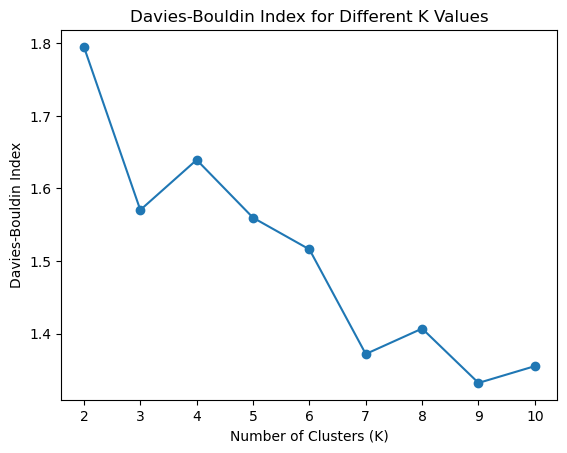

The best K value is: 9


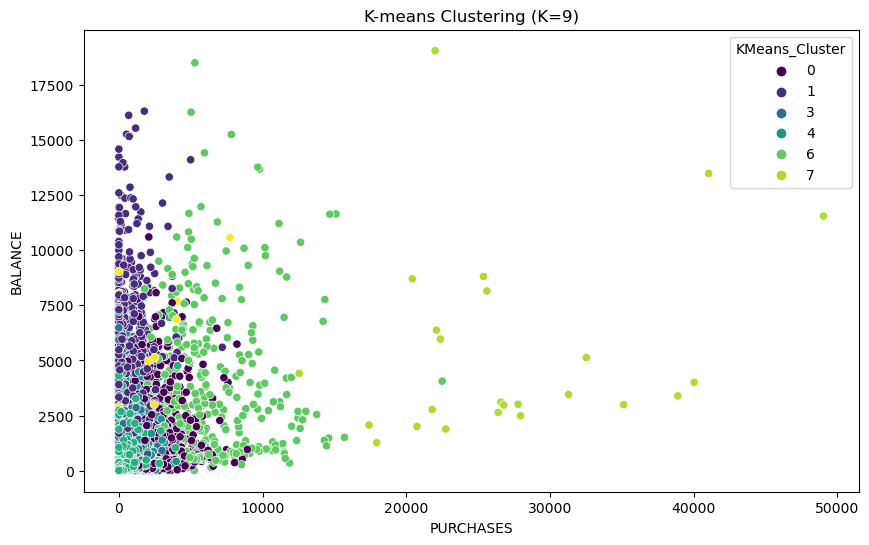

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

k_values = range(2, 11)
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, df['KMeans_Cluster']))

plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

best_k = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print(f"The best K value is: {best_k}")

best_kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = best_kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title(f'K-means Clustering (K={best_k})')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()